In [14]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df = df.iloc[:, 2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


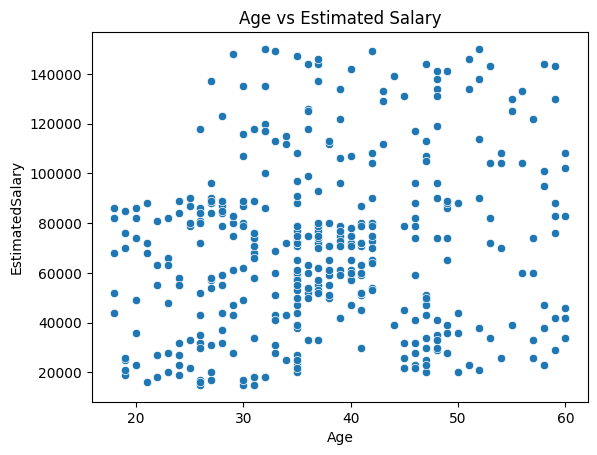

In [5]:
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1])
plt.title("Age vs Estimated Salary")
plt.show()

In [7]:
X = df.iloc[:, 0:2]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Without Normalizing

In [9]:
model = Sequential()

model.add(Dense(128, activation="relu", input_dim=2))
model.add(Dense(1, activation="sigmoid"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 18ms/step - loss: 429.4594 - accuracy: 0.5031 - val_loss: 211.1829 - val_accuracy: 0.6000
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 132.3087 - accuracy: 0.5531 - val_loss: 62.1499 - val_accuracy: 0.6000
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 31.3552 - accuracy: 0.5594 - val_loss: 7.3483 - val_accuracy: 0.6250
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 44.7556 - accuracy: 0.5656 - val_loss: 94.4862 - val_accuracy: 0.4000
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 36.5137 - accuracy: 0.4625 - val_loss: 21.1796 - val_accuracy: 0.6000
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 20.0742 - accuracy: 0.5469 - val_loss: 11.3289 - val_accuracy: 0.4000
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 36.7670 - accuracy: 0.4812 - val_loss: 104.2545 - val_accuracy: 0.

Epoch 58/100
10/10 [==============================] - 0s 6ms/step - loss: 13.1964 - accuracy: 0.5219 - val_loss: 8.6067 - val_accuracy: 0.6000
Epoch 59/100
10/10 [==============================] - 0s 5ms/step - loss: 26.8100 - accuracy: 0.5094 - val_loss: 47.9707 - val_accuracy: 0.4000
Epoch 60/100
10/10 [==============================] - 0s 5ms/step - loss: 47.3341 - accuracy: 0.4781 - val_loss: 72.3295 - val_accuracy: 0.6000
Epoch 61/100
10/10 [==============================] - 0s 5ms/step - loss: 85.4427 - accuracy: 0.4969 - val_loss: 191.2539 - val_accuracy: 0.6000
Epoch 62/100
10/10 [==============================] - 0s 5ms/step - loss: 92.5258 - accuracy: 0.5156 - val_loss: 139.9114 - val_accuracy: 0.6000
Epoch 63/100
10/10 [==============================] - 0s 5ms/step - loss: 72.4447 - accuracy: 0.5094 - val_loss: 73.0170 - val_accuracy: 0.4000
Epoch 64/100
10/10 [==============================] - 0s 5ms/step - loss: 80.7730 - accuracy: 0.4906 - val_loss: 106.1928 - val_accurac

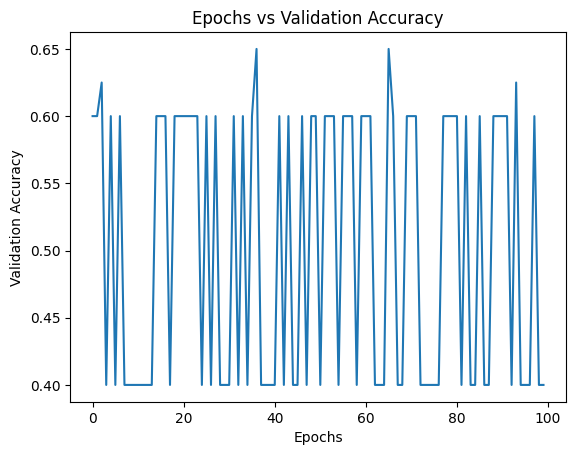

In [13]:
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Epochs vs Validation Accuracy")
plt.show()

## With Normalizing

In [15]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [19]:
model = Sequential()

model.add(Dense(128, activation="relu", input_dim=2))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100)

Epoch 1/100
10/10 [==============================] - 0s 15ms/step - loss: 0.6810 - accuracy: 0.5594 - val_loss: 0.6431 - val_accuracy: 0.8875
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6205 - accuracy: 0.8406 - val_loss: 0.5846 - val_accuracy: 0.8375
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5716 - accuracy: 0.8687 - val_loss: 0.5345 - val_accuracy: 0.8250
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5295 - accuracy: 0.8594 - val_loss: 0.4937 - val_accuracy: 0.8250
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4935 - accuracy: 0.8562 - val_loss: 0.4600 - val_accuracy: 0.8250
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4633 - accuracy: 0.8562 - val_loss: 0.4318 - val_accuracy: 0.8125
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4388 - accuracy: 0.8625 - val_loss: 0.4072 - val_accuracy: 0.8125
Epoch 8/100


Epoch 59/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2369 - accuracy: 0.9062 - val_loss: 0.2627 - val_accuracy: 0.9250
Epoch 60/100
10/10 [==============================] - 0s 6ms/step - loss: 0.2366 - accuracy: 0.9062 - val_loss: 0.2627 - val_accuracy: 0.9250
Epoch 61/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2363 - accuracy: 0.9062 - val_loss: 0.2620 - val_accuracy: 0.9250
Epoch 62/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2359 - accuracy: 0.9062 - val_loss: 0.2627 - val_accuracy: 0.9250
Epoch 63/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2359 - accuracy: 0.9062 - val_loss: 0.2626 - val_accuracy: 0.9250
Epoch 64/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2357 - accuracy: 0.9062 - val_loss: 0.2635 - val_accuracy: 0.9250
Epoch 65/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2354 - accuracy: 0.9062 - val_loss: 0.2633 - val_accuracy: 0.9250
Epoch 

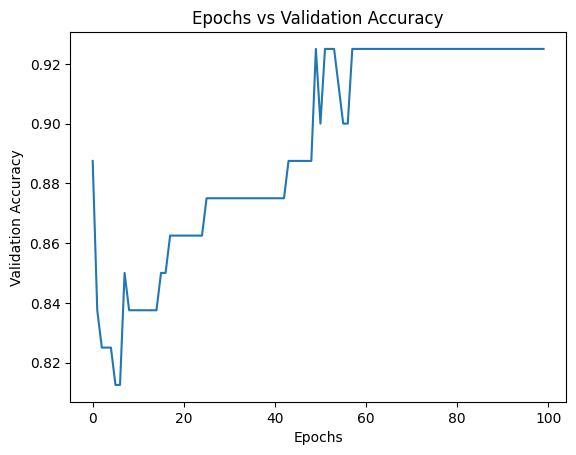

In [20]:
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Epochs vs Validation Accuracy")
plt.show()